# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [372]:
import numpy as np

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

BRIEFLY EXPLAIN HOW YOU SOLVE THE MODEL.

In [373]:
# code for solving the model (remember documentation and comments)

#Define the parameter values.
m=0.5
phi=0.3
epsilon=0.5
r=0.03
taug=0.012
taup=0.04
pbar=3.0

#Compute the optimal consumption, house price and utility.
h_star, c_star, u_star = inauguralproject.u_optimiser(m, r, pbar, taug, taup, epsilon, phi)

#Print the optimal values.
print('The optimal house quality/price is = ' + str(h_star))
print('The optimal consumption level is = ' + str(c_star))
print('The optimal utility level is = ' + str(u_star))


The optimal house quality/price is = 4.1666666039527485
The optimal consumption level is = 0.35000000225770106
The optimal utility level is = 0.7358414678061572


# Question 2

ADD ANSWER.

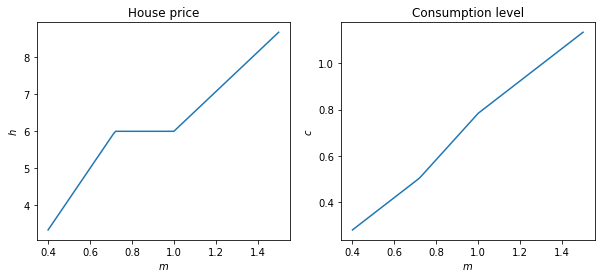

In [374]:
# Create an array for m and a container for the values of h* and c*.
N=100
m2=np.linspace(0.4,1.5,num=N)
h_star_values=np.empty(N)
c_star_values=np.empty(N)

#Create a loop that optimises over the m array.
for i,m in enumerate (m2):
    hc = inauguralproject.u_optimiser(m, r, pbar, taug, taup, epsilon, phi)

    h_star_values[i] = hc[0]
    c_star_values[i] = hc[1]

#Plot the figure.
inauguralproject.two_figures(m2,h_star_values,"House price", "$m$", "$h$", m2, c_star_values,"Consumption level", "$m$", "$c$")

# Question 3

ADD ANSWER.

In [375]:
# Calculating the total tax revenue.

#Set up the parameters:
seed=1
size=1000
mean=-0.4
sigma=0.35

#Plug it into the tax function
tax=inauguralproject.tax(seed,size,mean,sigma)
tax=float(tax)

#Print the results
print('The total tax revenue is: ' +str(tax))
print('Which means that the average household tax burden is: ' +str(tax/size))
print('This is in millions, so in real money it is: ' +str(tax*1000)+ ' DKK per household.')



The total tax revenue is: 81.97362144467166
Which means that the average household tax burden is: 0.08197362144467167
This is in millions, so in real money it is: 81973.62144467166 DKK per household.


# Question 4

ADD ANSWER.

In [376]:
#We will run the tax function again, but this time with different parameters:

#Set up the parameters:
seed=1
size=1000
mean=-0.4
sigma=0.35
epsilon_4=0.8
taug_4=0.015
taup_4=0.009
pbar_4=8.0

#Plug it into the tax function
tax_4=inauguralproject.tax(seed,size,mean,sigma,taug=taug_4,epsilon=epsilon_4,taup=taup_4,pbar=pbar_4)
tax_4=float(tax_4)

#Print the results
print('The new results are:')
print('Total tax revenue = ' +str(tax_4))
print('Average household tax burden = ' +str(tax_4/size))
print('Real money = ' +str(tax_4*1000)+ ' DKK per household.')


The new results are:
Total tax revenue = 77.76735789109402
Average household tax burden = 0.07776735789109403
Real money = 77767.35789109403 DKK per household.


# Question 5

ADD ANSWER.

# Conclusion

ADD CONCISE CONLUSION.